In [93]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#load dataset
df = pd.read_csv('./data/googleplaystore.csv')

In [95]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# size attribute

In [96]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [97]:
# converting M values into k values in a new column
def convert_size(x):
    if x[-1] in ['k', 'M']:
        unit = x[-1]
        value = float(x[:-1])
        if unit == 'M':
            value = value * 1024
        return value
    else:
        return x
    
df['Size_1'] = df['Size'].apply(convert_size)

In [98]:
non_numeric_values = df['Size_1'].apply(lambda x: isinstance(x, str)).sum()
print (non_numeric_values)
df['Size_1'].value_counts()

# here we are confirmed now that only the value "Varies with device" is non-numeric and there exists no other non-numeric value,
# so now we will try to immute this value.

1695


Varies with device    1695
11264.0                198
12288.0                196
14336.0                194
13312.0                191
                      ... 
430.0                    1
429.0                    1
200.0                    1
460.0                    1
619.0                    1
Name: Size_1, Length: 460, dtype: int64

In [99]:
# replace string value with null value
df['Size_1'] = df['Size_1'].replace('Varies with device',pd.NA)
df['Size_1'] = pd.to_numeric(df['Size_1'], errors='coerce')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,54272.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3686.4
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9728.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN


In [100]:
# now fill missing values with mean of df
df['Size_1'].fillna(df['Size_1'].mean(), inplace=True)
df['Size_1'].unique()

array([1.94560000e+04, 1.43360000e+04, 8.90880000e+03, 2.56000000e+04,
       2.86720000e+03, 5.73440000e+03, 2.96960000e+04, 3.37920000e+04,
       3.17440000e+03, 2.86720000e+04, 1.22880000e+04, 2.04800000e+04,
       2.15040000e+04, 3.78880000e+04, 2.76480000e+03, 5.63200000e+03,
       1.74080000e+04, 3.99360000e+04, 3.17440000e+04, 4.30080000e+03,
       7.16800000e+03, 2.35520000e+04, 6.14400000e+03, 6.24640000e+03,
       4.71040000e+03, 9.42080000e+03, 5.32480000e+03, 1.12640000e+04,
       2.45760000e+04, 2.20304803e+04, 9.62560000e+03, 1.53600000e+04,
       1.02400000e+04, 1.22880000e+03, 2.66240000e+04, 8.19200000e+03,
       8.08960000e+03, 5.73440000e+04, 5.83680000e+04, 3.58400000e+04,
       5.52960000e+04, 2.01000000e+02, 3.68640000e+03, 5.83680000e+03,
       8.80640000e+03, 2.45760000e+03, 2.76480000e+04, 2.56000000e+03,
       1.63840000e+04, 3.48160000e+03, 9.11360000e+03, 3.99360000e+03,
       2.96960000e+03, 3.89120000e+04, 3.27680000e+04, 5.52960000e+03,
      

In [101]:
# change data type of df['Size_1'] from float to int
df['Size_1'] = df['Size_1'].astype(int)


In [102]:
df['Size_1'].unique()
# :) now the values are good for the Size column

array([ 19456,  14336,   8908,  25600,   2867,   5734,  29696,  33792,
         3174,  28672,  12288,  20480,  21504,  37888,   2764,   5632,
        17408,  39936,  31744,   4300,   7168,  23552,   6144,   6246,
         4710,   9420,   5324,  11264,  24576,  22030,   9625,  15360,
        10240,   1228,  26624,   8192,   8089,  57344,  58368,  35840,
        55296,    201,   3686,   5836,   8806,   2457,  27648,   2560,
        16384,   3481,   9113,   3993,   2969,  38912,  32768,   5529,
        18432,   1126,   2252,   4608,  10035,  53248,   9216,   6860,
        30720,   2662,   7270,   3788,  22528,   7577,   6553,   3276,
         8396,  10137,   5017,   9728,   5120,   6041,  13312,  74752,
         6963,   3584,   4096,   2355,   7372,   2150,  43008,   7475,
         9318,  56320,     23,   6656,   1536,   7680,  52224,  41984,
        49152,   8704,  47104,   8499,   4403,   4812,   3379,  40960,
         7987,   9011,   6758,   5222,  62464,  67584,     79,   8601,
      

# Now working on Installs column

In [126]:
# first making it copy
df['Installs_1'] = df['Installs']

In [104]:
# first check if there is any value that does not end with a '+' sign?
has_no_plus = ~df['Installs_1'].str.endswith('+').all()
has_no_plus

True

In [105]:
# it says True, so lets see what are these values?
df.loc[~df['Installs_1'].str.endswith('+')]
# there is only one such row, and its value is 0, I have noted down its index 9148


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_1,Installs_1
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,22030,0


In [106]:
# removing last + sign (if exists)
df['Installs_1'] = df['Installs_1'].str.rstrip('+')
# now check if there is any value that ends with a '+' sign?
has_plus = df['Installs_1'].str.endswith('+').all()
has_plus

False

In [107]:
# check the index number 9148, is that good?
df.iloc[9148]


# value of Installs_1 is fine.

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                    NaN
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Size_1                                22030
Installs_1                                0
Name: 9148, dtype: object

In [109]:
# Remove commas and convert to integers
df['Installs_1'] = df['Installs_1'].str.replace(',', '').astype(int)

In [115]:
# now creating bins for Installs_1 column
df['Installs_1']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_1, Length: 10841, dtype: int32

In [124]:
# creating bins

# Create bins
bins = [0, 1000, 100000, 1000000, 5000000, 10000000, 100000000, float('inf')]

# Define labels for the bins
labels = ['1T', '100T', '1M', '5M', '10M', '100M', '100M+']

# Create a new column 'Installs_bins' with the bins
df['Installs_bins'] = pd.cut(df['Installs_1'], bins=bins, labels=labels, right=False)

# Display the DataFrame
df['Installs_bins']

0        100T
1          1M
2         10M
3        100M
4          1M
         ... 
10836    100T
10837      1T
10838    100T
10839    100T
10840    100M
Name: Installs_bins, Length: 10841, dtype: category
Categories (7, object): ['1T' < '100T' < '1M' < '5M' < '10M' < '100M' < '100M+']

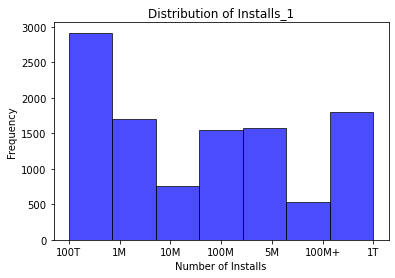

In [125]:
plt.hist(df['Installs_bins'], bins=7, edgecolor='k', alpha=0.7, color='blue')

# Add labels and title
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.title('Distribution of Installs_1')

# Show the plot
plt.show()

# Price Column

In [136]:
# make a copy of this
df['Price_1'] = df['Price']

# Remove '$' sign if it exists at the start of the values in the 'Price_1' column
df['Price_1'] = df['Price_1'].str.lstrip('$')

# Convert the 'Price_1' column to numeric
df['Price_1'] = pd.to_numeric(df['Price_1'], errors='coerce')

df['Price_1'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [139]:
# check its data type
df['Price_1'].dtype

# so its fine now... :)

dtype('float64')